## NOTEBOOL PARA REALIZAR EL EDA Y MODELOS DE PREDICCIÓN DEL DATASET DE TINTOS

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, SelectKBest
import xgboost as xgb
from collections import Counter
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

## CARGA DE DATOS Y PRIMERA VISIÓN DEL CONJUNTO

In [3]:
# Cargamos el dataset final de tintos. 

df = pd.read_csv("/Users/josetudela/Projects/EligeTuVino/eligetuvino/Archivos/FINAL_DF_TINTOS.csv")

## TRATAMIENTO DE DATOS PARA TENER EL DATASET LIMPIO Y CON LA ESTRUCTURA DESEADA

In [4]:
print(df[df["ID"] == 3876])

Empty DataFrame
Columns: [Url, ID, Nombre, Año, País, Región, Bodega, Tipo de vino, Uva, Precio, Valoración, Contenido de alcohol, Maridajes, Ligero/Poderoso, Suave/Tánico, Seco/Dulce, Débil/Ácido, Taste_Note_1, Taste_Note_2, Taste_Note_3]
Index: []


In [5]:
pd.set_option("display.max_colwidth", None)

In [6]:
df["Precio"] = df["Precio"].fillna("").astype(str).str.replace(",", "", regex=True)

In [7]:
df["Precio"] = pd.to_numeric(df["Precio"], errors="coerce")

In [8]:
#df.to_csv("FINAL_DF_TINTOS_PRECIO_CORREGIDO.csv")

In [9]:
# Modificamos maridaje porque contiene una "," en medio de la descrpción 

def limpiar_caza(texto):
    if isinstance(texto, str) and "caza" in texto.lower():  # Verifica si es texto y contiene "caza"
        return pd.Series(texto).replace(r"\s*\(.*?\)", "", regex=True).iloc[0]
    return texto  # Devuelve el texto sin cambios si no tiene "caza"

# Aplicar la limpieza a todas las celdas del DataFrame
df = df.applymap(limpiar_caza)

/var/folders/79/fd_qzfk141g8svblsrdwccqr0000gn/T/ipykernel_1562/211680032.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(limpiar_caza)


In [10]:
# Modificamos maridaje porque contiene una "," en medio de la descrpción 
def limpiar_pesca(texto):
    if isinstance(texto, str) and "azul " in texto.lower():  # Verifica si es texto y contiene "caza"
        return pd.Series(texto).replace(r"\s*\(.*?\)", "", regex=True).iloc[0]
    return texto  # Devuelve el texto sin cambios si no tiene "caza"

# Aplicar la limpieza a todas las celdas del DataFrame
df = df.applymap(limpiar_pesca)

/var/folders/79/fd_qzfk141g8svblsrdwccqr0000gn/T/ipykernel_1562/979100320.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(limpiar_pesca)


In [11]:
#Separamos la columna maridajes para que cada una sea una característica
df_maridaje_separado =  df["Maridajes"].str.split(',', expand=True)
df_maridaje_separado["ID"]= df["ID"]
df_maridaje_separado = df_maridaje_separado.fillna("Desconocido")
df_maridaje_separado[100:140]

,0,1,2,3,4,5,ID
100,Ternera,Cordero,Carne de caza,Desconocido,Desconocido,Desconocido,1181447
101,Ternera,Cordero,Pasta,Desconocido,Desconocido,Desconocido,1123194
102,Ternera,Cordero,Ternera lechal,Aves,Carne adobada,Desconocido,1420652
103,Ternera,Cordero,Aves,Pasta,Desconocido,Desconocido,2475833
104,Ternera,Cordero,Aves,Carne de caza,Desconocido,Desconocido,79640
105,Ternera lechal,Cerdo,Aves,Pasta,Carne de caza,Desconocido,1101307
106,Ternera,Cordero,Pasta,Carne de caza,Desconocido,Desconocido,1150701
107,Ternera lechal,Cerdo,Aves,Pasta,Carne de caza,Desconocido,1211200
108,Ternera,Cordero,Pasta,Carne de caza,Desconocido,Desconocido,1546843
109,Ternera,Ternera lechal,Aves,Carne de caza,Desconocido,Desconocido,2620585


In [12]:
# vemos los valores únicos para poder hacer one hot encoding. 
valores_unicos_maridaje = set(df_maridaje_separado.drop(columns=["ID"]).values.ravel())
print(valores_unicos_maridaje)

{' Queso tierno y cremoso', ' Queso curado', 'Ternera lechal', ' Queso de leche de cabra', ' Ternera lechal', ' Champiñones', ' Carne adobada', 'Ternera', 'Desconocido', 'Cerdo', ' Comida picante', 'Maridajes', ' Cerdo', ' Queso azul', 'Cordero', ' Aperitivos y tentempiés', 'Pasta', ' Aves', ' Carne de caza', ' Pescado blanco', 'Aves', ' Pasta', ' Cordero', ' La comida basura vale', ' Pescado azul', 'No disponible', 'Carne de caza', ' Vegetariana'}


In [13]:
df_maridaje_separado_sin_ID = df_maridaje_separado.drop(columns = "ID")

In [14]:
pd.get_dummies(df_maridaje_separado_sin_ID[[0,1]], prefix='', prefix_sep='')

,Aves,Carne de caza,Cerdo,Cordero,Maridajes,No disponible,Pasta,Ternera,Ternera lechal,Aperitivos y tentempiés,Aves,Carne adobada,Carne de caza,Cerdo,Cordero,Queso curado,Ternera lechal,Vegetariana,Desconocido
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20153,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
20154,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
20155,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
20156,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False


In [15]:
df_maridaje_separado_sin_ID = df_maridaje_separado.drop(columns=["ID"])

df_maridaje_separado_sin_ID = df_maridaje_separado_sin_ID.applymap(lambda x: x.replace(" ", "") if isinstance(x, str) else x)
# Convertir todo el DataFrame a One-Hot Encoding sin prefijos por columna
df_maridaje_separado_sin_ID_encoded = pd.get_dummies(df_maridaje_separado_sin_ID,drop_first=True ,prefix="" ,prefix_sep="")

# Convertir a DataFrame
df_maridaje_separado_sin_ID_encoded = pd.DataFrame(df_maridaje_separado_sin_ID_encoded)

# Mostrar resultado
display(df_maridaje_separado_sin_ID_encoded)

/var/folders/79/fd_qzfk141g8svblsrdwccqr0000gn/T/ipykernel_1562/3108444008.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_maridaje_separado_sin_ID = df_maridaje_separado_sin_ID.applymap(lambda x: x.replace(" ", "") if isinstance(x, str) else x)


,Carnedecaza,Cerdo,Cordero,Maridajes,Nodisponible,Pasta,Ternera,Terneralechal,Aves,Carneadobada,...,Champiñones,Comidapicante,Desconocido,Lacomidabasuravale,Quesocurado,Quesodelechedecabra,Quesotiernoycremoso,Desconocido,Quesoazul,Quesodelechedecabra
0,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20153,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
20154,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
20155,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
20156,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [16]:
df_maridaje_separado_sin_ID_encoded=df_maridaje_separado_sin_ID_encoded.groupby(axis=1, level=0).sum()
df_maridaje_separado_encoded = df_maridaje_separado_sin_ID_encoded
df_maridaje_separado_encoded["ID"] = df["ID"]
df_maridaje_separado_encoded

/var/folders/79/fd_qzfk141g8svblsrdwccqr0000gn/T/ipykernel_1562/1026340629.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_maridaje_separado_sin_ID_encoded=df_maridaje_separado_sin_ID_encoded.groupby(axis=1, level=0).sum()


,Aves,Carneadobada,Carnedecaza,Cerdo,Champiñones,Comidapicante,Cordero,Desconocido,Lacomidabasuravale,Maridajes,...,Pescadoazul,Pescadoblanco,Quesoazul,Quesocurado,Quesodelechedecabra,Quesotiernoycremoso,Ternera,Terneralechal,Vegetariana,ID
0,0,0,1,0,0,0,1,2,0,0,...,0,0,0,0,0,0,1,0,0,3105259
1,0,0,1,0,0,0,1,2,0,0,...,0,0,0,0,0,0,1,0,0,1280319
2,0,0,1,0,0,0,0,2,0,0,...,0,0,0,1,0,1,1,0,0,6365197
3,0,0,1,0,0,0,0,2,0,0,...,0,0,0,0,0,0,1,1,0,2573275
4,0,0,1,0,0,0,1,3,0,0,...,0,0,0,0,0,0,1,0,0,1133110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20153,0,0,0,0,0,0,1,3,0,0,...,0,0,0,0,0,0,1,0,0,17967
20154,1,0,0,0,0,0,1,2,0,0,...,0,0,0,0,0,0,1,1,0,1210509
20155,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,1,1,0,11571930
20156,0,0,0,0,0,0,1,3,0,0,...,0,0,0,0,0,0,1,0,0,1437498


In [43]:
df_maridaje_separado_encoded.to_csv("df_maridajes_one_hot.csv")

In [17]:
df_uvas_separado =  df["Uva"].str.split(',', expand=True)
df_uvas_separado["ID"]= df["ID"]
df_uvas_separado = df_uvas_separado.fillna("Desconocido")
df_uvas_separado[100:140]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,ID
100,Shiraz/Syrah,Grenache,Mourvedre,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,1181447
101,Aglianico,Piedirosso,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,1123194
102,Sangiovese,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,1420652
103,Cabernet Franc,Malbec,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,2475833
104,Nebbiolo,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,79640
105,Barbera,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,1101307
106,Cabernet Sauvignon,Cabernet Franc,Merlot,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,1150701
107,Barbera,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,1211200
108,Merlot,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,1546843
109,Pinot Nero,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,2620585


In [18]:
df_uvas_separado = df_uvas_separado.drop(columns = "ID")

df_uvas_separado = df_uvas_separado.applymap(lambda x: x.replace(" ", "") if isinstance(x, str) else x)
# Convertir todo el DataFrame a One-Hot Encoding sin prefijos por columna
df_uvas_separado = pd.get_dummies(df_uvas_separado,drop_first=True ,prefix="" ,prefix_sep="")

# Convertir a DataFrame
df_uvas_separado = pd.DataFrame(df_uvas_separado)

# Mostrar resultado
display(df_uvas_separado)

/var/folders/79/fd_qzfk141g8svblsrdwccqr0000gn/T/ipykernel_1562/3747642572.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_uvas_separado = df_uvas_separado.applymap(lambda x: x.replace(" ", "") if isinstance(x, str) else x)


,Agiorgitiko,Aglianico,Albariño,Albarossa,Albillo,AlbilloMayor,Aleatico,Alfrocheiro,AlfrocheiroPreto,AlicanteBouschet,...,Desconocido,Teroldego,Marzemino,Sangiovese,Oseleta,PetitVerdot,Shiraz/Syrah,Desconocido,Desconocido,Trebbiano
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20153,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
20154,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
20155,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
20156,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False


In [19]:
df_uvas_separado = df_uvas_separado.drop(columns="Desconocido")
df_uvas_separado=df_uvas_separado.groupby(axis=1, level=0).sum()
df_uvas_separado

/var/folders/79/fd_qzfk141g8svblsrdwccqr0000gn/T/ipykernel_1562/1971516612.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_uvas_separado=df_uvas_separado.groupby(axis=1, level=0).sum()


,Agiorgitiko,Aglianico,Albariño,Albarossa,Albillo,AlbilloMayor,Aleatico,Alfrocheiro,AlfrocheiroPreto,AlicanteBouschet,...,Vlosh,Vranac,Vuillermin,Weissburgunder,Welschriesling,Xarel-lo,Xinomavro,Zinfandel,Zweigelt,Águasanta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_uvas_separado.dtypes

Agiorgitiko    int64
Aglianico      int64
Albariño       int64
Albarossa      int64
Albillo        int64
               ...  
Xarel-lo       int64
Xinomavro      int64
Zinfandel      int64
Zweigelt       int64
Águasanta      int64
Length: 433, dtype: object

In [21]:
# Definir el umbral
umbral = 150

# Filtrar columnas cuya suma sea mayor al umbral
columnas_filtradas = df_uvas_separado.loc[:, df_uvas_separado.sum() > umbral]

columnas_filtradas

,Aglianico,Barbera,Blaufränkisch,CabernetFranc,CabernetSauvignon,Carignan,Cariñena,Corvina,Corvinone,Gamay,...,PetitVerdot,PinotNero,PinotNoir,Primitivo,Rondinella,Sangiovese,Shiraz/Syrah,Tempranillo,TourigaNacional,Zweigelt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20153,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20155,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
20156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_uvas_separado_filtro = columnas_filtradas

In [23]:
df_uvas_separado_filtro["ID"] = df["ID"]


/var/folders/79/fd_qzfk141g8svblsrdwccqr0000gn/T/ipykernel_1562/2394182584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uvas_separado_filtro["ID"] = df["ID"]


In [24]:
df_notas_sabor_mejorado = pd.read_csv("/Users/josetudela/Projects/EligeTuVino/eligetuvino/Archivos/df_notas_sabor.csv")

In [25]:
df_taste_1_separado_tijera_sin_ID = df_notas_sabor_mejorado.drop(columns="ID")

In [26]:
valores_unicos_taste = set(df_taste_1_separado_tijera_sin_ID.values.ravel())

# Filtrar None y aplicar strip() solo a los strings
valores_unicos_taste = {s.strip() for s in valores_unicos_taste if isinstance(s, str)}

print(valores_unicos_taste)

{'', 'virutas', 'grafito', 'pomelo', 'fresa salvaje', 'pizarra', 'mentol', 'caramelo', 'fruta negra', 'cítrico', 'almendra', 'roble', 'casis', 'hierro', 'jengibre', 'mermelada de mora', 'tomate', 'aroma', 'especias', 'café', 'pimienta molida', 'cigarrera', 'mermelada', 'carne adobada', 'higo', 'cera de abeja', 'aceite balsámico', 'humo', 'regaliz', 'ciruela', 'piedra', 'heno', 'zarzamora', 'salsa de fresa', 'rosa seca', 'tiza', 'acelga', 'carne de caza', 'mora', 'romero', 'granada', 'cigarro', 'eucalipto', 'ciruela roja', 'carne asada', 'pimienta de Jamaica', 'clavo de olor', 'chocolate amargo', 'trufa', 'tabaco dulce', 'ceniza', 'tostada', 'cereza negra', 'hongo', 'cuero', 'cereza', 'alquitrán', 'bergamota', 'regaliz negro', 'mezcla de especias para vino caliente', 'pétalo de rosa', 'vainilla', 'pimienta verde', 'sandía', 'almizcle', 'cereza Bing', 'hibisco', 'ajedrea', 'polvo de granito', 'frutos del bosque', 'frambuesa', 'especias exóticas', 'cereza roja', 'pimiento asado', 'cera de

In [27]:

# Convertir todo el DataFrame a One-Hot Encoding sin prefijos por columna
df_taste_1_one_hot_encoded = pd.get_dummies(df_taste_1_separado_tijera_sin_ID, prefix='', prefix_sep='')

# Convertir a DataFrame
df_taste_1_one_hot_encoded = pd.DataFrame(df_taste_1_one_hot_encoded)

df_taste_1_one_hot_encoded.columns= df_taste_1_one_hot_encoded.columns.str.strip()
# Mostrar resultado
display(df_taste_1_one_hot_encoded)

,aceite balsámico,ajedrea,algodón de azúcar,almendra,almizcle,alquitrán,anís,arándano,arándano rojo,arándano rojo deshidratado,...,tomate,tomillo,tostada,trufa,trufa negra,uva,uva pasa,vainilla,virutas,zarzamora
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20153,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20154,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20155,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20156,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
df_taste_1_one_hot_encoded=df_taste_1_one_hot_encoded.groupby(axis=1, level=0).sum()
df_taste_1_one_hot_encoded

/var/folders/79/fd_qzfk141g8svblsrdwccqr0000gn/T/ipykernel_1562/770153049.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_taste_1_one_hot_encoded=df_taste_1_one_hot_encoded.groupby(axis=1, level=0).sum()


,,aceite balsámico,acelga,ajedrea,algodón de azúcar,almendra,almizcle,alquitrán,anís,aroma,...,tomate,tomillo,tostada,trufa,trufa negra,uva,uva pasa,vainilla,virutas,zarzamora
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Definir el umbral
umbral = 250

# Filtrar columnas cuya suma sea mayor al umbral
columnas_filtradas = df_taste_1_one_hot_encoded.loc[:, df_taste_1_one_hot_encoded.sum() > umbral]

columnas_filtradas

df_taste_1_one_hot_encoded = columnas_filtradas

In [30]:
df_taste_1_one_hot_encoded = df_taste_1_one_hot_encoded.applymap(lambda x: 1 if x != 0 else 0)

/var/folders/79/fd_qzfk141g8svblsrdwccqr0000gn/T/ipykernel_1562/1271349127.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_taste_1_one_hot_encoded = df_taste_1_one_hot_encoded.applymap(lambda x: 1 if x != 0 else 0)


In [31]:
conteo_valores_unicos_taste = df_taste_1_one_hot_encoded.sum()

In [32]:
conteo_valores_unicos_taste

                      1244
aceite balsámico      1137
alquitrán              658
anís                   356
arándano              2204
arándano rojo          688
cacao                  857
café                  1116
canela                 662
caramelo               520
carne                  318
casis                 3529
cedro                 1728
cereza               10249
cereza Bing            646
cereza negra          1908
cereza roja            775
chocolate             5684
ciruela               7213
clavo de olor          948
cuero                 9135
eucalipto              267
frambuesa             5328
fresa                 3493
fruta negra           3820
fruta seca            1807
frutos del bosque     1435
frutos rojos          5858
grafito                321
hierro                 556
hongo                 1853
humo                  5017
mantequilla            363
menta                  538
mermelada              553
minerales             2427
mora                  8537
p

In [33]:
df_taste_1_one_hot_encoded["ID"] = df["ID"]

In [34]:
df_merged_one_hot = pd.concat([df.set_index("ID"), df_maridaje_separado_encoded.set_index("ID"), df_taste_1_one_hot_encoded.set_index("ID"),df_uvas_separado_filtro.set_index("ID")], axis=1).reset_index()

display(df_merged_one_hot.head())

,ID,Url,Nombre,Año,País,Región,Bodega,Tipo de vino,Uva,Precio,...,PetitVerdot,PinotNero,PinotNoir,Primitivo,Rondinella,Sangiovese,Shiraz/Syrah,Tempranillo,TourigaNacional,Zweigelt
0,3105259,https://www.vivino.com/ES/es/crealto-pionda/w/3105259,Pionda,2018,Italia,Monferrato,Crealto,Vino tinto,Nebbiolo,32.53,...,0,0,0,0,0,0,0,0,0,0
1,1280319,https://www.vivino.com/ES/es/karpatska-perla-varieto-frankovka-modra/w/1280319,Varieto Frankovka Modrá,2021,Eslovaquia,Malokarpatská,Karpatská Perla,Vino tinto,Blaufränkisch,32.52,...,0,0,0,0,0,0,0,0,0,0
2,6365197,https://www.vivino.com/ES/es/giachino-giac-potes/w/6365197,Giac' Potes,2023,Francia,Savoie,Domaine Giachino,Vino tinto,"Gamay, Mondeuse Noire",32.52,...,0,0,0,0,0,0,0,0,0,0
3,2573275,https://www.vivino.com/ES/es/pelz-pinot-nero/w/2573275,Pinot Nero,2020,Italia,Vigneti delle Dolomiti,Pelz,Vino tinto,Pinot Nero,32.50,...,0,1,0,0,0,0,0,0,0,0
4,1133110,https://www.vivino.com/ES/es/finca-la-capilla-la-capilla-vendimia-seleccionada/w/1133110,La Capilla Vendimia Seleccionada,2021,España,Ribera del Duero,Finca La Capilla,Vino tinto,Tinta del Pais,32.50,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_merged_one_hot=df_merged_one_hot.drop(index=5264)

In [36]:
df_merged_one_hot["ID"] = df_merged_one_hot["ID"].astype(int)

In [37]:
df_merged_one_hot = df_merged_one_hot.drop(columns=["Tipo de vino","Url"])

In [38]:
df_merged_one_hot[["Nombre","País","Región","Bodega"]] = df_merged_one_hot[["Nombre","País","Región","Bodega"]].astype(str)

In [39]:
df_merged_one_hot_droped= df_merged_one_hot.drop(columns=["Año","Uva","Nombre","Maridajes","Taste_Note_1","Taste_Note_2","Taste_Note_3"])

In [40]:
df_merged_one_hot_droped["Valoración"] = pd.to_numeric(df_merged_one_hot["Valoración"], errors='coerce')
df_merged_one_hot_droped["Contenido de alcohol"] = pd.to_numeric(df_merged_one_hot["Contenido de alcohol"], errors='coerce')
df_merged_one_hot_droped["Ligero/Poderoso"] = pd.to_numeric(df_merged_one_hot["Ligero/Poderoso"], errors='coerce')
df_merged_one_hot_droped["Suave/Tánico"] = pd.to_numeric(df_merged_one_hot["Suave/Tánico"], errors='coerce')
df_merged_one_hot_droped["Seco/Dulce"] = pd.to_numeric(df_merged_one_hot["Seco/Dulce"], errors='coerce')
df_merged_one_hot_droped["Débil/Ácido"] = pd.to_numeric(df_merged_one_hot["Débil/Ácido"], errors='coerce')
df_merged_one_hot_droped["Precio"] = pd.to_numeric(df_merged_one_hot["Precio"], errors='coerce')




In [41]:
df_merged_one_hot_droped = df_merged_one_hot_droped.drop(index=17564)

In [42]:
df_merged_one_hot_droped

,ID,País,Región,Bodega,Precio,Valoración,Contenido de alcohol,Ligero/Poderoso,Suave/Tánico,Seco/Dulce,...,PetitVerdot,PinotNero,PinotNoir,Primitivo,Rondinella,Sangiovese,Shiraz/Syrah,Tempranillo,TourigaNacional,Zweigelt
0,3105259,Italia,Monferrato,Crealto,32.53,3.8,5.0,5.5,7.6,0.1,...,0,0,0,0,0,0,0,0,0,0
1,1280319,Eslovaquia,Malokarpatská,Karpatská Perla,32.52,3.5,13.0,4.9,5.3,2.5,...,0,0,0,0,0,0,0,0,0,0
2,6365197,Francia,Savoie,Domaine Giachino,32.52,3.8,NaN,3.0,3.4,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2573275,Italia,Vigneti delle Dolomiti,Pelz,32.50,3.8,NaN,4.0,3.5,1.9,...,0,1,0,0,0,0,0,0,0,0
4,1133110,España,Ribera del Duero,Finca La Capilla,32.50,4.3,15.0,6.6,5.4,1.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20153,17967,Italia,Carignano del Sulcis,Santadi,12.40,3.6,14.0,7.3,4.0,2.6,...,0,0,0,0,0,0,0,0,0,0
20154,1210509,España,Rioja,Finca Nueva,10.85,3.7,13.0,6.1,6.1,0.7,...,0,0,0,0,0,0,0,1,0,0
20155,11571930,España,Vino de España,Campestral,10.85,3.7,13.0,4.9,4.7,2.8,...,1,0,0,0,0,0,1,0,0,0
20156,1437498,España,Montsant,Portal del Montsant,8.51,3.5,5.0,6.9,4.3,1.3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#df_merged_one_hot_droped.to_csv("df_merged.csv")

In [468]:
X= df_merged_one_hot_droped.drop(columns="Valoración")
y = df_merged_one_hot_droped["Valoración"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [469]:
import pandas as pd

def mean_encode_smoothing(train_col, y_train, test_col, alpha=10):
    """
    Aplica Mean Encoding con Smoothing a una columna categórica.
    
    train_col: pd.Series con la columna categórica de entrenamiento.
    y_train: pd.Series con la variable objetivo de entrenamiento.
    test_col: pd.Series con la columna categórica de test.
    alpha: Factor de suavizado, valores más altos suavizan más.
    
    Devuelve: Columnas transformadas para entrenamiento y test.
    """
    mean_global = y_train.mean()  # Media global de la variable objetivo
    category_stats = y_train.groupby(train_col).agg(['mean', 'count'])  # Media y frecuencia por categoría
    category_stats['smooth'] = (category_stats['mean'] * category_stats['count'] + mean_global * alpha) / (category_stats['count'] + alpha)
    
    # Aplicamos la transformación a train y test
    train_encoded = train_col.map(category_stats['smooth'])
    test_encoded = test_col.map(category_stats['smooth']).fillna(mean_global)  # Fillna para valores no vistos
    
    return train_encoded, test_encoded

# Aplicamos la función a cada variable categórica
X_train['Bodega_encoded'], X_test['Bodega_encoded'] = mean_encode_smoothing(X_train['Bodega'], y_train, X_test['Bodega'])
X_train['País_encoded'], X_test['País_encoded'] = mean_encode_smoothing(X_train['País'], y_train, X_test['País'])
X_train['Región_encoded'], X_test['Región_encoded'] = mean_encode_smoothing(X_train['Región'], y_train, X_test['Región'])


# Eliminamos las columnas originales
#X_train.drop(columns=["País", "Región", "Bodega"], inplace=True)
#X_test.drop(columns=["País", "Región", "Bodega"], inplace=True)

In [ ]:
#X_train.to_csv("X_train_dict_pais.csv")

In [470]:
X_train["País_encoded"].unique()

array([3.99349604, 3.86038278, 3.88000214, 3.95385695, 3.93143226,
       3.94884706, 3.959563  , 3.94222484, 4.01918912, 3.98190004,
       3.80685102, 4.1930377 , 4.03705236, 3.92866868, 4.02104006,
       3.91098194, 3.82104006, 3.97104006, 3.89547501, 4.03432387,
       3.88880008, 3.90138675, 3.86002504, 3.85130008, 3.93396368,
       3.90862866, 3.89104006, 3.96552739, 4.02630008, 3.80148581,
       3.87630008, 3.94734557, 3.91006677, 3.93825466, 3.95173344,
       3.74240008, 4.00173344, 3.90189103, 3.95643648])

In [471]:
X_train["País"].unique()

array(['Francia', 'España', 'Austria', 'Italia', 'Alemania', 'Sudáfrica',
       'Portugal', 'Argentina', 'Australia', 'Israel', 'Chile',
       'Estados Unidos', 'New Zealand', 'Croacia', 'Moldavia',
       'Marruecos', 'Canadá', 'Líbano', 'Grecia', 'Uruguay', 'Hungría',
       'México', 'Eslovenia', 'Brasil', 'Suiza', 'Bélgica', 'Georgia',
       'Siria', 'Armenia', 'Perú', 'China', 'Chipre', 'Serbia', 'Rumanía',
       'Ucrania', 'Norte de Macedonia', 'Bulgaria', 'Albania',
       'Eslovaquia', 'Países Bajos', 'Japón'], dtype=object)

In [472]:
dic_pais = dict(zip(X_train["País"], X_train["País_encoded"]))

In [473]:
dic_pais

{'Francia': 3.993496038591642,
 'España': 3.860382783665711,
 'Austria': 3.8800021424866373,
 'Italia': 3.9538569516938864,
 'Alemania': 3.9314322640092283,
 'Sudáfrica': 3.948847061633992,
 'Portugal': 3.959563001277544,
 'Argentina': 3.9422248408170013,
 'Australia': 4.019189124421786,
 'Israel': 3.9819000403125777,
 'Chile': 3.8068510153691437,
 'Estados Unidos': 4.193037703801925,
 'New Zealand': 4.0370523576510235,
 'Croacia': 3.9286686759701865,
 'Moldavia': 4.0210400645001245,
 'Marruecos': 3.910981935454771,
 'Canadá': 3.8210400645001243,
 'Líbano': 3.9710400645001243,
 'Grecia': 3.8954750100781443,
 'Uruguay': 4.034323870952498,
 'Hungría': 3.888800080625155,
 'México': 3.901386752666832,
 'Eslovenia': 3.8600250403125775,
 'Brasil': 3.8513000806251547,
 'Suiza': 3.933963675454621,
 'Bélgica': 3.908628663571606,
 'Georgia': 3.8910400645001237,
 'Siria': 3.9655273900002257,
 'Armenia': 4.026300080625155,
 'Perú': 3.8014858064287487,
 'China': 3.876300080625155,
 'Chipre': 3.9473

In [474]:
X_train.drop(columns=["País", "Región", "Bodega"], inplace=True)
X_test.drop(columns=["País", "Región", "Bodega"], inplace=True)

In [475]:
X_train_precio_no_disponible = X_train[X_train["Precio"]=="No disponible"].index
X_train_alcohol_no_disponible = X_train[X_train["Contenido de alcohol"]=="No disponible"].index
X_test_precio_no_disponible = X_test[X_test["Precio"]=="No disponible"].index
X_test_alcohol_no_dispobible = X_test[X_test["Contenido de alcohol"]=="No disponible"].index

In [476]:
X_train["Contenido de alcohol"].isna().sum()

np.int64(2127)

In [477]:

from sklearn.impute import KNNImputer

# Crear el modelo KNN Imputer (por ejemplo, usando k=5)
knn_imputer = KNNImputer(n_neighbors=5)

# 1. Imputar los valores faltantes en X_train
X_train_imputed = knn_imputer.fit_transform(X_train)

# Convertir el resultado imputado a un DataFrame si lo deseas
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# 2. Imputar los valores faltantes en X_test usando el mismo modelo entrenado en X_train
X_test_imputed = knn_imputer.transform(X_test)

# Convertir también X_test imputado a un DataFrame
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)


In [478]:
X_train_imputed.isna().sum().sum()

np.int64(0)

In [479]:
X_test_imputed

,ID,Precio,Contenido de alcohol,Ligero/Poderoso,Suave/Tánico,Seco/Dulce,Débil/Ácido,Aves,Carneadobada,Carnedecaza,...,Primitivo,Rondinella,Sangiovese,Shiraz/Syrah,Tempranillo,TourigaNacional,Zweigelt,Bodega_encoded,País_encoded,Región_encoded
0,1201379.0,75.74,10.0,5.2,3.7,1.0,7.2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.026300,3.993496,4.044343
1,1196431.0,17.60,13.0,7.4,7.1,0.1,7.1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.947346,3.993496,3.820833
2,2138987.0,16.17,5.0,6.5,5.3,0.7,5.7,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.040062,3.993496,3.802481
3,5782405.0,23.06,13.0,0.0,1.9,0.0,8.5,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.854165,3.993496,3.924800
4,2809968.0,22.60,13.0,6.6,4.0,1.7,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.878523,3.953857,4.005600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,1241518.0,23.26,14.0,6.8,4.2,1.4,1.9,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.883709,3.953857,3.828832
4028,3416054.0,22.50,13.0,4.6,4.6,1.0,5.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.951733,3.953857,4.061835
4029,5726850.0,16.00,14.0,4.7,4.7,1.7,5.2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.916985,3.860383,3.952083
4030,4305839.0,10.99,14.0,8.5,4.7,0.9,4.6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.918400,3.860383,3.844123


In [480]:
X_train_imputed

,ID,Precio,Contenido de alcohol,Ligero/Poderoso,Suave/Tánico,Seco/Dulce,Débil/Ácido,Aves,Carneadobada,Carnedecaza,...,Primitivo,Rondinella,Sangiovese,Shiraz/Syrah,Tempranillo,TourigaNacional,Zweigelt,Bodega_encoded,País_encoded,Región_encoded
0,1128968.0,360.00,13.0,4.7,3.5,1.2,7.4,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.091467,3.993496,4.015772
1,1478235.0,13.48,10.4,8.2,4.9,1.5,5.6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.943400,3.860383,4.112247
2,3146052.0,4.48,5.0,5.5,3.4,1.6,4.1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.847754,3.860383,3.644701
3,6181943.0,42.50,5.0,2.0,2.2,0.1,7.4,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.947346,3.880002,3.826174
4,1169092.0,41.50,13.0,4.8,5.7,0.8,6.3,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.951733,3.953857,4.253210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,5014272.0,46.55,23.8,2.3,2.4,1.1,6.6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.955446,4.037052,4.075371
16120,2945399.0,18.50,5.0,8.5,5.1,1.3,5.4,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.976733,3.860383,4.112247
16121,2287923.0,58.90,5.0,5.9,6.8,0.5,8.4,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.080832,3.953857,4.122070
16122,9876372.0,16.30,5.0,6.1,3.7,0.0,3.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.929164,3.860383,3.762443


In [481]:
# Escalar características con MinMaxScaler (esto es opcional para XGBoost)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_imputed.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_imputed.columns)

# Entrenar el modelo con los datos escalados


In [482]:
X_train_imputed["Precio"].max()

np.float64(30492.5)

In [483]:
X_train_imputed

,ID,Precio,Contenido de alcohol,Ligero/Poderoso,Suave/Tánico,Seco/Dulce,Débil/Ácido,Aves,Carneadobada,Carnedecaza,...,Primitivo,Rondinella,Sangiovese,Shiraz/Syrah,Tempranillo,TourigaNacional,Zweigelt,Bodega_encoded,País_encoded,Región_encoded
0,1128968.0,360.00,13.0,4.7,3.5,1.2,7.4,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.091467,3.993496,4.015772
1,1478235.0,13.48,10.4,8.2,4.9,1.5,5.6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.943400,3.860383,4.112247
2,3146052.0,4.48,5.0,5.5,3.4,1.6,4.1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.847754,3.860383,3.644701
3,6181943.0,42.50,5.0,2.0,2.2,0.1,7.4,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.947346,3.880002,3.826174
4,1169092.0,41.50,13.0,4.8,5.7,0.8,6.3,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.951733,3.953857,4.253210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,5014272.0,46.55,23.8,2.3,2.4,1.1,6.6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.955446,4.037052,4.075371
16120,2945399.0,18.50,5.0,8.5,5.1,1.3,5.4,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.976733,3.860383,4.112247
16121,2287923.0,58.90,5.0,5.9,6.8,0.5,8.4,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.080832,3.953857,4.122070
16122,9876372.0,16.30,5.0,6.1,3.7,0.0,3.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.929164,3.860383,3.762443


In [484]:
X_test_imputed

,ID,Precio,Contenido de alcohol,Ligero/Poderoso,Suave/Tánico,Seco/Dulce,Débil/Ácido,Aves,Carneadobada,Carnedecaza,...,Primitivo,Rondinella,Sangiovese,Shiraz/Syrah,Tempranillo,TourigaNacional,Zweigelt,Bodega_encoded,País_encoded,Región_encoded
0,1201379.0,75.74,10.0,5.2,3.7,1.0,7.2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.026300,3.993496,4.044343
1,1196431.0,17.60,13.0,7.4,7.1,0.1,7.1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.947346,3.993496,3.820833
2,2138987.0,16.17,5.0,6.5,5.3,0.7,5.7,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.040062,3.993496,3.802481
3,5782405.0,23.06,13.0,0.0,1.9,0.0,8.5,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.854165,3.993496,3.924800
4,2809968.0,22.60,13.0,6.6,4.0,1.7,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.878523,3.953857,4.005600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,1241518.0,23.26,14.0,6.8,4.2,1.4,1.9,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.883709,3.953857,3.828832
4028,3416054.0,22.50,13.0,4.6,4.6,1.0,5.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.951733,3.953857,4.061835
4029,5726850.0,16.00,14.0,4.7,4.7,1.7,5.2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.916985,3.860383,3.952083
4030,4305839.0,10.99,14.0,8.5,4.7,0.9,4.6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.918400,3.860383,3.844123


In [485]:
X_test_imputed.to_csv("X_test_imputed.csv")
X_train_imputed.to_csv("X_train_imputed.csv")

In [486]:
print(pd.DataFrame(X_train_scaled).isnull().sum())  # Verifica NaNs
X_train_scaled = np.nan_to_num(X_train_scaled)  # Reemplaza NaNs con 0

ID                      0
Precio                  0
Contenido de alcohol    0
Ligero/Poderoso         0
Suave/Tánico            0
                       ..
TourigaNacional         0
Zweigelt                0
Bodega_encoded          0
País_encoded            0
Región_encoded          0
Length: 113, dtype: int64


In [487]:
# Crear y entrenar el modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [488]:
X_train_scaled.shape

(16124, 113)

In [489]:
X_train.shape

(16124, 113)

,Feature,Importance
110,Bodega_encoded,0.185626
1,Precio,0.083883
111,País_encoded,0.033082
69,roble,0.029786
47,cuero,0.019706
67,polvo de vainilla,0.018377
40,cereza,0.015930
3,Ligero/Poderoso,0.015699
112,Región_encoded,0.015431
8,Carneadobada,0.015317


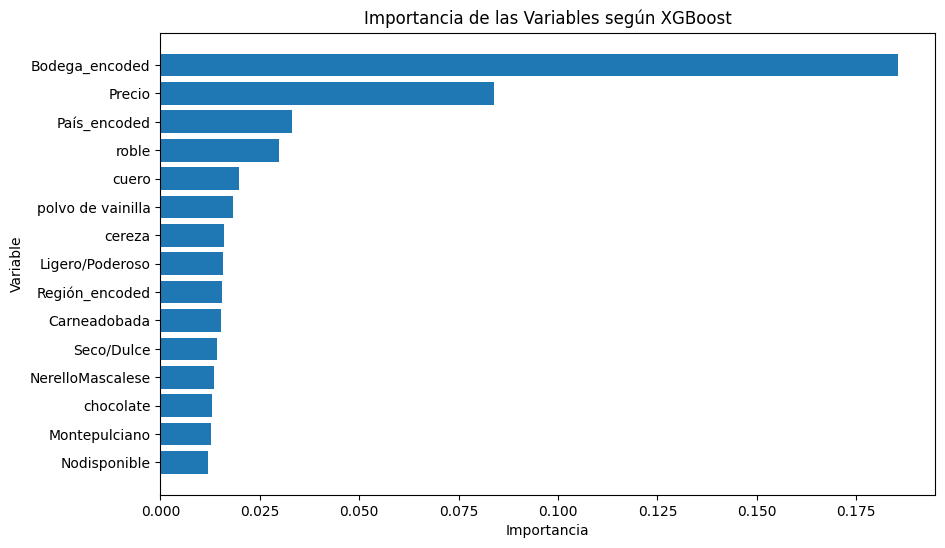

In [490]:
import matplotlib.pyplot as plt
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# Extraer la importancia de las características
feature_importance = xgb_model.feature_importances_

# Crear un DataFrame con la importancia de cada variable
df_importance = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': feature_importance})
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# Mostrar las variables más importantes
display(df_importance[:30])

# Graficar la importancia de las variables
plt.figure(figsize=(10,6))
plt.barh(df_importance['Feature'][:15], df_importance['Importance'][:15])
plt.gca().invert_yaxis()  # Invertir eje Y para mostrar las más importantes arriba
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de las Variables según XGBoost")
plt.show()

In [491]:
top_features = df_importance['Feature'][0:19].tolist()  #
X_train_selected = X_train_scaled[top_features]
X_test_selected = X_test_scaled[top_features]
X_train_selected

,Bodega_encoded,Precio,País_encoded,roble,cuero,polvo de vainilla,cereza,Ligero/Poderoso,Región_encoded,Carneadobada,Seco/Dulce,NerelloMascalese,chocolate,Montepulciano,Nodisponible,Nodisponible,Cordero,vainilla,Cerdo,Quesodelechedecabra
0,0.572556,0.011801,0.557202,0.0,1.0,0.0,1.0,0.552941,0.612367,0.0,0.193548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.347616,0.000437,0.261813,1.0,1.0,0.0,0.0,0.964706,0.743799,0.0,0.241935,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.202312,0.000141,0.261813,1.0,0.0,0.0,1.0,0.647059,0.106843,0.0,0.258065,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.353610,0.001388,0.305350,1.0,0.0,0.0,1.0,0.235294,0.354071,0.0,0.016129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.360276,0.001355,0.469239,1.0,1.0,0.0,1.0,0.564706,0.935839,0.0,0.129032,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,0.365916,0.001521,0.653856,0.0,1.0,0.0,1.0,0.270588,0.693563,0.0,0.177419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16120,0.398255,0.000601,0.261813,1.0,1.0,0.0,0.0,1.000000,0.743799,0.0,0.209677,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
16121,0.556400,0.001926,0.469239,1.0,1.0,0.0,1.0,0.694118,0.757182,0.0,0.080645,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
16122,0.325988,0.000529,0.261813,0.0,1.0,0.0,1.0,0.717647,0.267248,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


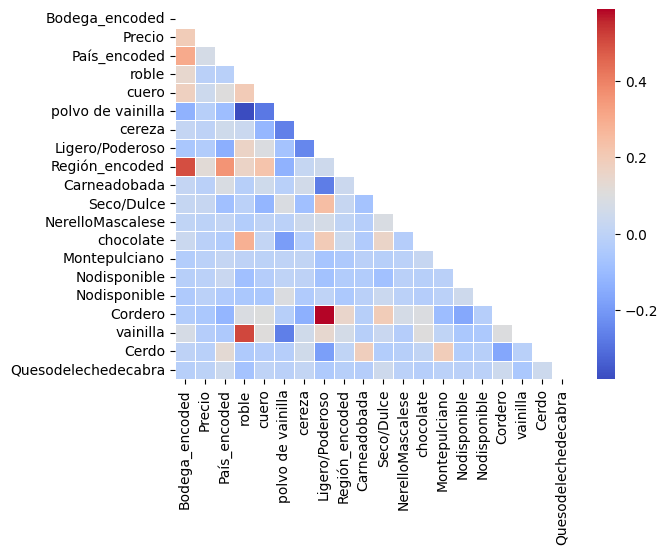

In [492]:
# Copia de los datos
X_corr = X_train_selected.copy()

# Calcula la matriz de correlación
corr = X_corr.corr()

# Crea una máscara para la mitad superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Genera el heatmap SIN valores numéricos
sns.heatmap(corr, mask=mask, cmap='coolwarm', linewidths=0.5)

plt.show()

In [493]:
correlation_matrix = X_test_selected.corr()

# Muestra la matriz de correlación
display(correlation_matrix)

,Bodega_encoded,Precio,País_encoded,roble,cuero,polvo de vainilla,cereza,Ligero/Poderoso,Región_encoded,Carneadobada,Seco/Dulce,NerelloMascalese,chocolate,Montepulciano,Nodisponible,Nodisponible,Cordero,vainilla,Cerdo,Quesodelechedecabra
Bodega_encoded,1.000000,1.595779e-01,0.294766,0.091948,0.116552,-0.082688,0.062544,-0.118783,0.349746,-0.014644,-4.190707e-02,-0.006761,-0.006200,-0.028840,-0.017006,-0.030228,-0.088729,0.044239,0.003926,-0.004248
Precio,0.159578,1.000000e+00,0.097924,-0.026291,0.027838,-0.014094,-0.002360,-0.031716,0.133536,-0.003052,9.687224e-07,-0.005982,-0.030145,-0.010672,-0.011124,-0.012229,-0.061782,-0.016395,-0.019991,-0.008491
País_encoded,0.294766,9.792423e-02,1.000000,-0.013390,0.121377,-0.086775,0.047089,-0.148134,0.354983,0.092216,-8.968347e-02,0.016728,-0.032980,0.019572,0.037564,-0.035778,-0.127655,-0.051591,0.132472,0.044012
roble,0.091948,-2.629067e-02,-0.013390,1.000000,0.187609,-0.372229,0.040414,0.178052,0.156583,-0.018216,2.497980e-02,-0.024068,0.287562,0.015047,-0.071494,-0.077251,0.140326,0.549271,-0.031874,-0.076055
cuero,0.116552,2.783803e-02,0.121377,0.187609,1.000000,-0.273101,-0.125825,0.096850,0.218977,0.054509,-1.119932e-01,0.002157,0.007375,0.015398,-0.030316,-0.049949,0.102174,0.102641,-0.027812,-0.004834
polvo de vainilla,-0.082688,-1.409403e-02,-0.086775,-0.372229,-0.273101,1.000000,-0.267437,-0.051029,-0.116688,-0.027786,9.473875e-02,-0.030448,-0.187386,-0.010103,0.016509,0.126708,-0.029086,-0.273328,-0.004043,0.003159
cereza,0.062544,-2.360148e-03,0.047089,0.040414,-0.125825,-0.267437,1.000000,-0.237155,0.041490,0.062294,-5.390354e-02,0.044664,0.013317,-0.011935,-0.036142,-0.044176,-0.141455,0.060207,0.039543,0.009445
Ligero/Poderoso,-0.118783,-3.171636e-02,-0.148134,0.178052,0.096850,-0.051029,-0.237155,1.000000,0.030032,-0.286295,2.187873e-01,0.080597,0.184283,-0.056452,-0.080665,-0.012346,0.589266,0.158036,-0.191810,-0.048747
Región_encoded,0.349746,1.335361e-01,0.354983,0.156583,0.218977,-0.116688,0.041490,0.030032,1.000000,0.029877,-5.964615e-03,0.010805,0.041297,-0.038364,-0.032201,-0.027458,0.131926,0.083729,0.019254,-0.018441
Carneadobada,-0.014644,-3.052365e-03,0.092216,-0.018216,0.054509,-0.027786,0.062294,-0.286295,0.029877,1.000000,-6.253093e-02,-0.025905,-0.030181,-0.003020,-0.033735,0.006117,-0.044728,-0.055923,0.209837,-0.027002


In [494]:
vif = pd.Series([variance_inflation_factor(X_train_selected.corr().values, i) for i in range(X_train_selected.corr().shape[1])], index=X_train_selected.columns)
vif

Bodega_encoded         3.771528
Precio                 1.218475
País_encoded           2.405462
roble                  5.556117
cuero                  2.247953
polvo de vainilla      3.741373
cereza                 2.184069
Ligero/Poderoso        8.984761
Región_encoded         4.717732
Carneadobada           1.879953
Seco/Dulce             1.752977
NerelloMascalese       1.097802
chocolate              1.924667
Montepulciano          1.220221
Nodisponible           1.212232
Nodisponible           1.078172
Cordero                6.573828
vainilla               3.411134
Cerdo                  1.620550
Quesodelechedecabra    1.151695
dtype: float64

In [495]:
X_train_selected = X_train_selected.drop(columns=["Bodega_encoded"])
X_test_selected = X_test_selected.drop(columns=["Bodega_encoded"])


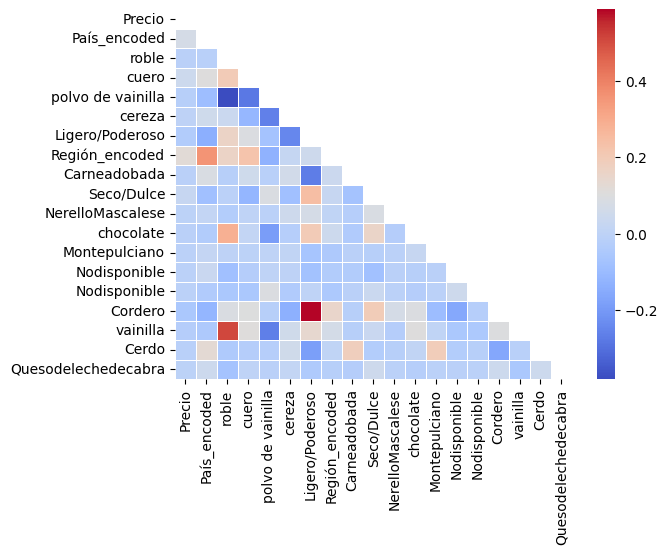

In [496]:
# Copia de los datos
X_corr = X_train_selected.copy()

# Calcula la matriz de correlación
corr = X_corr.corr()

# Crea una máscara para la mitad superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Genera el heatmap SIN valores numéricos
sns.heatmap(corr, mask=mask, cmap='coolwarm', linewidths=0.5)

plt.show()

In [497]:
correlation_matrix = X_train_selected.corr()

# Muestra la matriz de correlación
display(correlation_matrix)

,Precio,País_encoded,roble,cuero,polvo de vainilla,cereza,Ligero/Poderoso,Región_encoded,Carneadobada,Seco/Dulce,NerelloMascalese,chocolate,Montepulciano,Nodisponible,Nodisponible,Cordero,vainilla,Cerdo,Quesodelechedecabra
Precio,1.000000,0.069883,-0.011436,0.044505,-0.021773,-0.002470,-0.036016,0.119270,-0.014141,0.024223,-0.004992,-0.010700,-0.009293,-0.008030,-0.009110,-0.052253,-0.029427,-0.014940,-0.006270
País_encoded,0.069883,1.000000,-0.014629,0.106812,-0.092124,0.052950,-0.142384,0.358626,0.086062,-0.083468,0.015725,-0.035592,0.017483,0.033114,-0.038359,-0.117459,-0.047238,0.129317,0.044004
roble,-0.011436,-0.014629,1.000000,0.199441,-0.381680,0.036567,0.161252,0.162116,-0.019400,-0.010069,-0.032954,0.286343,-0.002440,-0.083235,-0.052384,0.091307,0.509276,-0.041359,-0.071287
cuero,0.044505,0.106812,0.199441,1.000000,-0.281589,-0.114621,0.092169,0.225305,0.053812,-0.116734,0.003661,0.015075,-0.003379,-0.026454,-0.054355,0.100032,0.110086,-0.026224,0.003455
polvo de vainilla,-0.021773,-0.092124,-0.381680,-0.281589,1.000000,-0.262797,-0.071522,-0.128658,-0.017700,0.090582,-0.009803,-0.190637,0.002315,0.001723,0.093381,-0.021268,-0.266627,-0.024484,-0.014111
cereza,-0.002470,0.052950,0.036567,-0.114621,-0.262797,1.000000,-0.246576,0.020781,0.061106,-0.083272,0.046604,-0.025467,0.009007,-0.002474,-0.040379,-0.138054,0.055860,0.055839,0.013772
Ligero/Poderoso,-0.036016,-0.142384,0.161252,0.092169,-0.071522,-0.246576,1.000000,0.046755,-0.269173,0.246661,0.069328,0.199350,-0.067120,-0.075839,0.001697,0.587882,0.137482,-0.184919,-0.042902
Región_encoded,0.119270,0.358626,0.162116,0.225305,-0.128658,0.020781,0.046755,1.000000,0.041425,0.025960,0.007681,0.046160,-0.047965,-0.033248,-0.049899,0.149134,0.065664,0.005970,-0.020439
Carneadobada,-0.014141,0.086062,-0.019400,0.053812,-0.017700,0.061106,-0.269173,0.041425,1.000000,-0.073660,-0.025109,-0.040172,-0.010939,-0.036940,-0.013224,-0.020931,-0.021318,0.184445,-0.027452
Seco/Dulce,0.024223,-0.083468,-0.010069,-0.116734,0.090582,-0.083272,0.246661,0.025960,-0.073660,1.000000,0.087127,0.159306,-0.019030,-0.079892,0.038261,0.194439,0.032111,-0.032388,0.048744


In [498]:
vif = pd.Series([variance_inflation_factor(X_train_selected.corr().values, i) for i in range(X_train_selected.corr().shape[1])], index=X_train_selected.columns)
vif

Precio                 1.111538
País_encoded           2.210322
roble                  5.477841
cuero                  2.187031
polvo de vainilla      3.693730
cereza                 2.177787
Ligero/Poderoso        8.940752
Región_encoded         2.619131
Carneadobada           1.876887
Seco/Dulce             1.732870
NerelloMascalese       1.097282
chocolate              1.922404
Montepulciano          1.218645
Nodisponible           1.209353
Nodisponible           1.076245
Cordero                6.486628
vainilla               3.393890
Cerdo                  1.612707
Quesodelechedecabra    1.151118
dtype: float64

In [499]:
X_train_selected = X_train_selected.drop(columns=["Región_encoded","Nodisponible","vainilla","Cordero"])
X_test_selected = X_test_selected.drop(columns=["Región_encoded","Nodisponible","vainilla","Cordero"])


In [500]:
X_train_selected.to_csv("X_train_selected.csv")
X_test_selected.to_csv("X_test_selected.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")

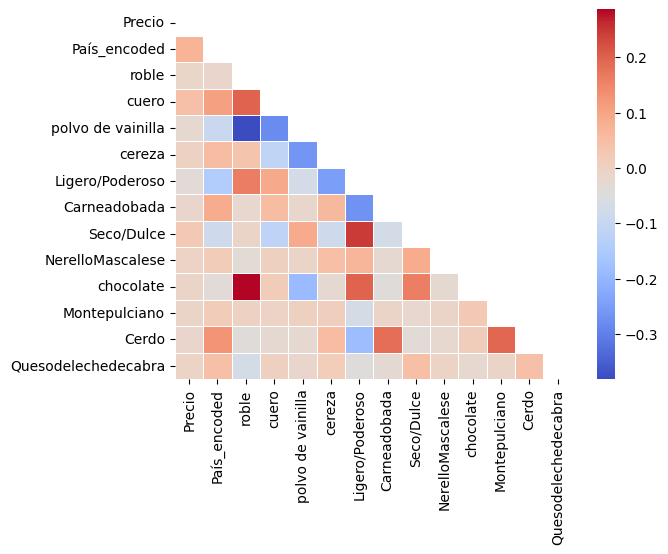

In [501]:
X_corr = X_train_selected.copy()

# Calcula la matriz de correlación
corr = X_corr.corr()

# Crea una máscara para la mitad superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Genera el heatmap SIN valores numéricos
sns.heatmap(corr, mask=mask, cmap='coolwarm', linewidths=0.5)

plt.show()

In [502]:
correlation_matrix = X_train_selected.corr()

# Muestra la matriz de correlación
display(correlation_matrix)

,Precio,País_encoded,roble,cuero,polvo de vainilla,cereza,Ligero/Poderoso,Carneadobada,Seco/Dulce,NerelloMascalese,chocolate,Montepulciano,Cerdo,Quesodelechedecabra
Precio,1.000000,0.069883,-0.011436,0.044505,-0.021773,-0.002470,-0.036016,-0.014141,0.024223,-0.004992,-0.010700,-0.009293,-0.014940,-0.006270
País_encoded,0.069883,1.000000,-0.014629,0.106812,-0.092124,0.052950,-0.142384,0.086062,-0.083468,0.015725,-0.035592,0.017483,0.129317,0.044004
roble,-0.011436,-0.014629,1.000000,0.199441,-0.381680,0.036567,0.161252,-0.019400,-0.010069,-0.032954,0.286343,-0.002440,-0.041359,-0.071287
cuero,0.044505,0.106812,0.199441,1.000000,-0.281589,-0.114621,0.092169,0.053812,-0.116734,0.003661,0.015075,-0.003379,-0.026224,0.003455
polvo de vainilla,-0.021773,-0.092124,-0.381680,-0.281589,1.000000,-0.262797,-0.071522,-0.017700,0.090582,-0.009803,-0.190637,0.002315,-0.024484,-0.014111
cereza,-0.002470,0.052950,0.036567,-0.114621,-0.262797,1.000000,-0.246576,0.061106,-0.083272,0.046604,-0.025467,0.009007,0.055839,0.013772
Ligero/Poderoso,-0.036016,-0.142384,0.161252,0.092169,-0.071522,-0.246576,1.000000,-0.269173,0.246661,0.069328,0.199350,-0.067120,-0.184919,-0.042902
Carneadobada,-0.014141,0.086062,-0.019400,0.053812,-0.017700,0.061106,-0.269173,1.000000,-0.073660,-0.025109,-0.040172,-0.010939,0.184445,-0.027452
Seco/Dulce,0.024223,-0.083468,-0.010069,-0.116734,0.090582,-0.083272,0.246661,-0.073660,1.000000,0.087127,0.159306,-0.019030,-0.032388,0.048744
NerelloMascalese,-0.004992,0.015725,-0.032954,0.003661,-0.009803,0.046604,0.069328,-0.025109,0.087127,1.000000,-0.026596,-0.008616,-0.021718,-0.008473


In [503]:
vif = pd.Series([variance_inflation_factor(X_train_selected.corr().values, i) for i in range(X_train_selected.corr().shape[1])], index=X_train_selected.columns)
vif

Precio                 1.049820
País_encoded           1.282427
roble                  2.496239
cuero                  1.913353
polvo de vainilla      3.377795
cereza                 2.089848
Ligero/Poderoso        2.860942
Carneadobada           1.551463
Seco/Dulce             1.615564
NerelloMascalese       1.086145
chocolate              1.798877
Montepulciano          1.194729
Cerdo                  1.535609
Quesodelechedecabra    1.078028
dtype: float64

In [504]:
model_forest = RandomForestRegressor(random_state = 42)
model_forest.fit(X_train_selected, y_train)

y_test_pred = model_forest.predict(X_test_selected)
y_train_pred = model_forest.predict(X_train_selected)


In [505]:
metrics = {
    "MAE": [mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)],
    "RMSE": [(mean_squared_error(y_train, y_train_pred) ** 0.5), (mean_squared_error(y_test, y_test_pred) ** 0.5)],
    "R²": [r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)]
}

df_metrics = pd.DataFrame(metrics, index=["Train", "Test"])

display(df_metrics)

,MAE,RMSE,R²
Train,0.050596,0.068347,0.945419
Test,0.138557,0.186543,0.594042


In [506]:

from sklearn.model_selection import RandomizedSearchCV


# Definir espacio de búsqueda de hiperparámetros
hyperparams = {
    "n_estimators": [50, 100, 200, 300],  # Probar un número reducido de estimadores
    "max_depth": [None, 10, 20, 30],  # Niveles de profundidad
    "min_samples_split": [2, 5, 10],  # Mínimo número de muestras para dividir
    "min_samples_leaf": [1, 2, 4],  # Mínimo número de muestras en la hoja
    "max_features": ["sqrt", "log2"],  # Cuántas características se consideran en cada división
}

# Crear el RandomizedSearchCV
random_search = RandomizedSearchCV(
    model_forest,  # Tu modelo base ya creado
    param_distributions=hyperparams,
    n_iter=20,  # Número de combinaciones a probar
    scoring="r2",  # Métrica de regresión
    cv=5,  # Validación cruzada con 5 particiones
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1,
    random_state=42
)

# Ajustar el modelo con los datos de entrenamiento
random_search.fit(X_train_selected, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [508]:
# Extraer el modelo con los mejores hiperparámetros encontrados por RandomizedSearchCV
model_forest_2 = RandomForestRegressor(random_state = 42,n_estimators=100,min_samples_split=10,min_samples_leaf=3,max_features='log2',max_depth=None)
model_forest_2.fit(X_train_selected, y_train)

y_test_pred = model_forest_2.predict(X_test_selected)
y_train_pred = model_forest_2.predict(X_train_selected)

In [509]:
import joblib

# Guardar el modelo entrenado en un archivo
joblib.dump(model_forest_2, 'modelo_RF_vinos.joblib')

['modelo_RF_vinos.joblib']

In [ ]:
# Cargar el modelo guardado
loaded_model = joblib.load('modelo_RF_vinos.joblib')

# Usar el modelo cargado para hacer predicciones
predictions = loaded_model.predict(X)
print(predictions)

In [ ]:
# Cargar el modelo guardado
modelo_RF_vinos = joblib.load('random_forest_model.joblib')

# Usar el modelo cargado para hacer predicciones
predictions = loaded_model.predict(X)
print(predictions)

In [512]:
metrics = {
    "MAE": [mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)],
    "RMSE": [(mean_squared_error(y_train, y_train_pred) ** 0.5), (mean_squared_error(y_test, y_test_pred) ** 0.5)],
    "R²": [r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)],
    "MAPE": [mean_absolute_percentage_error(y_train, y_train_pred) * 100, 
              mean_absolute_percentage_error(y_test, y_test_pred) * 100] }

df_metrics = pd.DataFrame(metrics, index=["Train", "Test"])

display(df_metrics)

,MAE,RMSE,R²,MAPE
Train,0.112031,0.149941,0.737312,2.908914
Test,0.135588,0.181848,0.614220,3.519300


In [336]:
X_train_selected

,Precio,País_encoded,roble,cuero,polvo de vainilla,cereza,Ligero/Poderoso,Carneadobada,Seco/Dulce,NerelloMascalese,chocolate,Montepulciano,Cerdo,Quesodelechedecabra
0,0.011801,0.557202,0.0,1.0,0.0,1.0,0.552941,0.0,0.193548,0.0,0.0,0.0,0.0,0.0
1,0.000437,0.261813,1.0,1.0,0.0,0.0,0.964706,0.0,0.241935,0.0,1.0,0.0,0.0,0.0
2,0.000141,0.261813,1.0,0.0,0.0,1.0,0.647059,0.0,0.258065,0.0,1.0,0.0,0.0,0.0
3,0.001388,0.305350,1.0,0.0,0.0,1.0,0.235294,0.0,0.016129,0.0,0.0,0.0,0.0,0.0
4,0.001355,0.469239,1.0,1.0,0.0,1.0,0.564706,0.0,0.129032,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,0.001521,0.653856,0.0,1.0,0.0,1.0,0.270588,0.0,0.177419,0.0,0.0,0.0,0.0,0.0
16120,0.000601,0.261813,1.0,1.0,0.0,0.0,1.000000,0.0,0.209677,0.0,1.0,0.0,0.0,0.0
16121,0.001926,0.469239,1.0,1.0,0.0,1.0,0.694118,0.0,0.080645,0.0,0.0,0.0,0.0,0.0
16122,0.000529,0.261813,0.0,1.0,0.0,1.0,0.717647,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [337]:
#conversor precios

def conversor_precio(precio):
 return precio/df["Precio"].max()

def conversor_sabor(sabor):
 return sabor/8.5





In [338]:
conversor_precio(19)

np.float64(0.0006231040419775355)

In [361]:


viñas_del_vero = [5,'España', 1, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0]

viñas_del_vero_final = [conversor_precio(5),dic_pais[viñas_del_vero[1]], 1, 0, 0, 0, conversor_sabor(5), conversor_sabor(1), 0, 0, 0, 0, 0, 0]

In [362]:
viñas_del_vero_final

[np.float64(0.00016397474788882511),
 3.860382783665711,
 1,
 0,
 0,
 0,
 0.5882352941176471,
 0.11764705882352941,
 0,
 0,
 0,
 0,
 0,
 0]

In [363]:


# Crear nuevo DataFrame con los mismos encabezados
prediccion = pd.DataFrame([viñas_del_vero_final], columns=X_train_selected.columns)

print(prediccion)

     Precio  País_encoded  roble  cuero  polvo de vainilla  cereza  \
0  0.000164      3.860383      1      0                  0       0   

   Ligero/Poderoso  Carneadobada  Seco/Dulce  NerelloMascalese  chocolate  \
0         0.588235      0.117647           0                 0          0   

   Montepulciano  Cerdo  Quesodelechedecabra  
0              0      0                    0  


In [364]:
prediccion_nota = model_forest_2.predict(prediccion)

print(prediccion_nota)

[3.63242208]


In [357]:
sommos_reserva = ['España', 1, 1, 0, 0, 7, 0.5, 0, 0, 0, 0, 0]
sommos_reserva_final = [conversor_precio(19.99),dic_pais[sommos_reserva[0]], 1, 0, 0, 0, conversor_sabor(sommos_reserva[5]), conversor_sabor(sommos_reserva[6]), 0, 0, 0, 0, 0, 0]

In [358]:
prediccion = pd.DataFrame([sommos_reserva_final], columns=X_train_selected.columns)

prediccion_nota = model_forest_2.predict(prediccion)

print(prediccion_nota)

[3.85186671]


In [174]:
modelo_linear = LinearRegression()
modelo_linear.fit(X_train_selected, y_train)

print (modelo_linear.intercept_)
print(modelo_linear.coef_)

y_test_pred = modelo_linear.predict(X_test_selected)
y_train_pred = modelo_linear.predict(X_train_selected)



3.6115842234573923
[ 2.05546104  0.44727594  0.07015643  0.09122929 -0.05622695 -0.05132619
  0.02886867  0.00798574  0.2756946   0.0044623   0.01632455 -0.09292271]


In [175]:
metrics = {
    "MAE": [mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)],
    "RMSE": [(mean_squared_error(y_train, y_train_pred) ** 0.5), (mean_squared_error(y_test, y_test_pred) ** 0.5)],
    "R²": [r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)]
}

df_metrics = pd.DataFrame(metrics, index=["Train", "Test"])

display(df_metrics)

,MAE,RMSE,R²
Train,0.213653,0.267873,0.161589
Test,0.212603,0.267565,0.164818


In [176]:
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train_selected, y_train)

y_test_pred = modelo_linear.predict(X_test_selected)
y_train_pred = modelo_linear.predict(X_train_selected)



In [177]:
metrics = {
    "MAE": [mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)],
    "RMSE": [(mean_squared_error(y_train, y_train_pred) ** 0.5), (mean_squared_error(y_test, y_test_pred) ** 0.5)],
    "R²": [r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)]
}

df_metrics = pd.DataFrame(metrics, index=["Train", "Test"])

display(df_metrics)

,MAE,RMSE,R²
Train,0.213653,0.267873,0.161589
Test,0.212603,0.267565,0.164818
